# Построение пи-функции последовательности Фибоначчи

[1.0, 3.1622776601683795, 10.0, 31.622776601683793, 100.0, 316.22776601683796, 1000.0, 3162.2776601683795, 10000.0, 31622.776601683792, 100000.0, 316227.7660168379, 1000000.0, 3162277.6601683795, 10000000.0, 31622776.60168379, 100000000.0, 316227766.01683795, 1000000000.0, 3162277660.1683793, 10000000000.0, 31622776601.683792, 100000000000.0, 316227766016.83795, 1000000000000.0, 3162277660168.3794, 10000000000000.0, 31622776601683.793, 100000000000000.0, 316227766016837.94, 1000000000000000.0, 3162277660168379.5, 1e+16, 3.162277660168379e+16]
[0, 2, 3, 4, 5, 6, 6, 7, 7, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]


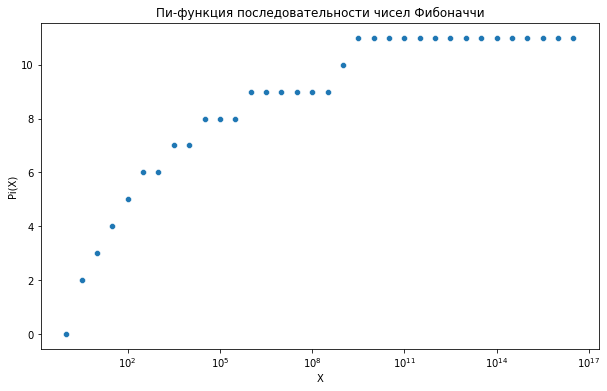

[2, 3, 5, 13, 89, 233, 1597, 28657, 514229, 433494437, 2971215073]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


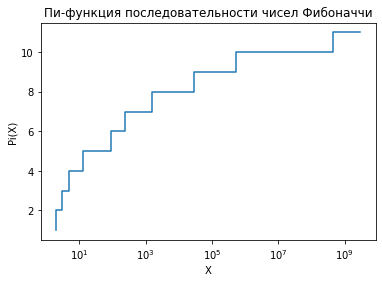

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Функция заполняет пустой массив числами Фибоначчи, не превосходящими заданный супремум
# и возвращает заполненный массив, 
def Fib_numbers_fill(supremum, Fib_array):
    #Сначала разберем отдельно случаи, в которых супремум меньше 2 (тривиальные)
    if supremum < 0:
        return Fib_array
    elif supremum < 1:
        Fib_array.append(0)
        return Fib_array
    elif supremum < 2:
        Fib_array.append(0)
        Fib_array.append(1)
        Fib_array.append(1)
        return Fib_array
    #Основной случай:
    else:
        #Добавляем первые 3 элемента и устанавливаем ими рабочии переменные:
        #последнее число Фибоначчи и 2 предпоследних
        Fib_array.append(0)
        Fib_array.append(1)
        Fib_array.append(1)
        Fib_num_1 = 1
        Fib_num_2 = 1
        Fib_num = 2
        #Пока последнее число не превосходит заданный супремум, добавляем к массиву последнее число
        #затем пересчитываем предпоследние (сдвигом), затем считаем последнее, как их сумму
        while Fib_num <= supremum:
            Fib_array.append(Fib_num)
            Fib_num_1 = Fib_num_2
            Fib_num_2 = Fib_num
            Fib_num = Fib_num_1 + Fib_num_2

        return Fib_array


#Функция проверки числа на простоту
def is_a_prime_number(number):
    #Если число не целое или <= 1, то не простое
    if number <= 1 or isinstance(number, int) == False:
        return False
    is_prime = True

    i = 2
    #обычный поиск делителей, который пробегает до корня из числа
    while i * i <= number:
        if number % i == 0:
            is_prime = False
            break
        i += 1

    return is_prime

#Функция, считающая количество простых чисел в массиве (чисел Фибоначчи)
def count_primes(array):
    count = 0

    for i in range(len(array)):
        if is_a_prime_number(array[i]):
            count += 1

    return count

#Функция, которая берет массив чисел Фибоначчи и возвращает массив, с только простыми числами Фибоначчи
#Для того, чтобы создать все точки скачка пи-функции для построения ее ступенчатого графика
def cut_composites(array_Fibb):
    arr_Fib_prime = []
    
    for i in array_Fibb:
        if is_a_prime_number(i):
            arr_Fib_prime.append(i)
    
    return arr_Fib_prime

#Функция подсчета значения пи-функции числа
#Создается массив, заполненный числами Фибоначчи, не превосходящими, данное число,
# и затем подсчитывается, сколько из них простые
def Pi_func(x):
    Fib_numbers = []
    Fib_numbers = Fib_numbers_fill(x, Fib_numbers)
    pi_F = count_primes(Fib_numbers)
    return pi_F

#Функция построения графика пи-функции (точечный график), максимальное значение аргумента - заданная степень десяти
def pi_func_plot(deg_max):
    x = []
    y = []

    #Генерируются значения аргументов(степени десятки с шагом 0.5), по ним высчитываются их пи-функции
    for i in range(deg_max * 2):#18 possible but slow
        x.append(10**(i / 2))
        y.append(Pi_func(x[i]))

    print(x)
    print(y)
    #Построение графика, через датафрейм и библиотеку seaborn
    data = pd.DataFrame({
    'x': x,
    'Pi(x)': y
    })

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='x', y='Pi(x)')

    plt.xscale('log')

    plt.title('Пи-функция последовательности чисел Фибоначчи')
    plt.xlabel('X')
    plt.ylabel('Pi(X)')

    plt.show()
    

#Другое построение графика: ступенчатое, более соответствующее математическому    
def pi_func_plot_2(deg_max):
    x = []
    y = []

    #Аргументы генерируются не как степени десятки, а как простые числа Фибоначчи, на которых происходят скачки
    x = Fib_numbers_fill(10**deg_max, x)
    x = cut_composites(x)
    for i in range(len(x)):
        y.append(Pi_func(x[i]))
    
    print(x)
    print(y)

    #Построение
    plt.plot(x, y, drawstyle='steps-pre')
    plt.xscale('log')
    plt.title('Пи-функция последовательности чисел Фибоначчи')
    plt.xlabel('X')
    plt.ylabel('Pi(X)')
    plt.show()

    

pi_func_plot(17)#18 possible but slow
pi_func_plot_2(16)

    
    



# Завсиимость времени построения графика, от максимального аргумента пи-функции

Время выполнения: 0.0000 секунд
Время выполнения: 0.0000 секунд
Время выполнения: 0.0001 секунд
Время выполнения: 0.0001 секунд
Время выполнения: 0.0002 секунд
Время выполнения: 0.0005 секунд
Время выполнения: 0.0011 секунд
Время выполнения: 0.0024 секунд
Время выполнения: 0.0080 секунд
Время выполнения: 0.0119 секунд
Время выполнения: 0.1113 секунд
Время выполнения: 0.1233 секунд
Время выполнения: 0.1141 секунд
Время выполнения: 0.1542 секунд
Время выполнения: 0.1888 секунд
Время выполнения: 0.2293 секунд
Время выполнения: 5.7158 секунд
Время выполнения: 9.7547 секунд


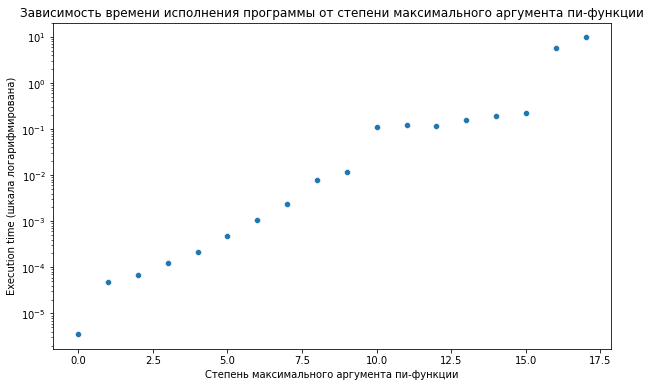

In [11]:
#Функция, производящаяя, все действия функции строящей график, кроме самого построения
# и считающая затраченное время
def pi_func_plot_time_measure(deg_max):
    start_time = time.time()
    x = []
    y = []

    for i in range(deg_max * 2):#18 possible but slow
        x.append(10**(i / 2))
        y.append(Pi_func(x[i]))

    end_time = time.time()  

    execution_time = end_time - start_time
    print(f"Время выполнения: {execution_time:.4f} секунд")

    return execution_time

    

    
#Функция, которая строит зависимость времени выполнения построения графика пи-функции
#от степени максимального его аргумента
def plot_execution_time(deg_max):
    deg = []
    ex_time = []
    for i in range(deg_max + 1):
        deg.append(i)
        ex_t = pi_func_plot_time_measure(i)
        #print("Время выполнения программы " + str(ex_t) + " секунд")
        ex_time.append(ex_t)

    data = pd.DataFrame({
    'deg x': deg,
    'Execution_time': ex_time
    })

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='deg x', y='Execution_time')

    plt.yscale('log')

    plt.title('Зависимость времени исполнения программы от степени максимального аргумента пи-функции')
    plt.xlabel('Степень максимального аргумента пи-функции')
    plt.ylabel('Execution time (шкала логарифмирована)')

    plt.show()
        
plot_execution_time(17)#16 - 5 сек, 17, 15 сек
    


    
    


In [18]:
#Тут я просто немного поэкспериментрировал с распараллеливанием в другой задаче
def func(x):
    sum = 0
    for i in range(x):
        sum += i

    return sum


#print(func(1000000))

import time

time_0 = time.time()
for i in range(1000, 3000000, 10000):
    t = func(i)
time_1 = time.time()
print(time_1 - time_0)

from multiprocessing import Process

time_0 = time.time()

p = [Process(target = func, args = (i,)) for i in range(1000, 3000000, 10000)]
for i in p:
    i.start()
for i in p:
    i.join()

time_1 = time.time()
print(time_1 - time_0)

40.94188475608826
26.116021156311035
